# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.pyplot import figure


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LABS/Módulo 2/lab-plotting-multiple-data-series-master/data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [ ]:
data.shape

(128355, 9)

In [ ]:
columns = list(data.columns)
columns

['Year',
 'Month',
 'Supplier',
 'ItemCode',
 'Description',
 'ItemType',
 'RetailSales',
 'RetailTransfers',
 'WarehouseSales']

In [ ]:
data2=data.copy()

In [ ]:
clean=data2.isnull().sum()
clean[clean>0]

Supplier    24
ItemType     1
dtype: int64

In [ ]:
null_displ = data2[(data2['Supplier'].isnull()==True) | (data2['ItemType'].isnull()==True)]

null_displ

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
19483,2017,6,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,0.0,-9.0
20056,2017,8,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,0.0,-5.0
32282,2017,6,NaN,BC,BEER CREDIT,REF,0.0,0.0,-58.0
32283,2017,6,NaN,WC,WINE CREDIT,REF,0.0,0.0,-8.0
45871,2017,8,NaN,BC,BEER CREDIT,REF,0.0,0.0,-699.0
45872,2017,8,NaN,WC,WINE CREDIT,REF,0.0,0.0,-5.0
46518,2017,9,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,0.0,-9.0
59259,2017,9,NaN,BC,BEER CREDIT,REF,0.0,0.0,-502.0
59260,2017,9,NaN,WC,WINE CREDIT,REF,0.0,0.0,-15.0
59920,2017,10,NaN,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0.0,0.0,-6.0


In [ ]:
data2.dropna(subset = ["Supplier"], inplace=True)
data2.dropna(subset = ["ItemType"], inplace=True)


In [ ]:
data2.isnull().sum()

Year               0
Month              0
Supplier           0
ItemCode           0
Description        0
ItemType           0
RetailSales        0
RetailTransfers    0
WarehouseSales     0
dtype: int64

In [ ]:
data2

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,2.0
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.00,0.0,2.0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0


In [ ]:
data2.WarehouseSales.min()

-4996.0

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [ ]:
item_type=data2.pivot_table(index=['ItemType'], values=['RetailSales', 'RetailTransfers', 'WarehouseSales'])
item_type

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,12.770966,14.302858,148.408969
DUNNAGE,0.000000,0.000000,-1886.458333
KEGS,0.000000,0.000000,11.973062
LIQUOR,10.911288,11.768018,1.168198
NON-ALCOHOL,12.913965,14.424156,13.784586
REF,8.038286,4.912000,0.000000
STR_SUPPLIES,9.396038,33.912264,0.000000
WINE,3.963231,4.308592,5.475795


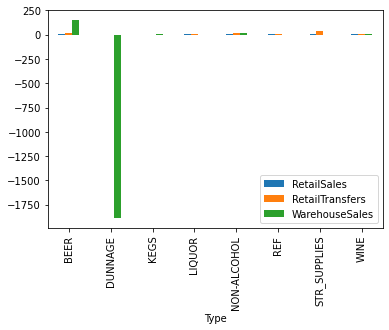

<Figure size 960x320 with 0 Axes>

In [ ]:
item_type.plot(kind='bar');
plt.xlabel('Type');
plt.xticks(rotation=90);
figure(figsize=(12, 4), dpi=80);

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [ ]:
avg_sup_sales = data2.groupby("Supplier", as_index=False).agg({"RetailSales":"mean","WarehouseSales":"mean"})
avg_sup_sales2=avg_sup_sales.copy()
avg_sup_sales2['Avg Sales']= avg_sup_sales2['RetailSales']+avg_sup_sales2['WarehouseSales']
avg_sup_sales2

,Supplier,RetailSales,WarehouseSales,Avg Sales
0,8 VINI INC,0.308889,0.111111,0.420000
1,A HARDY USA LTD,0.133333,0.000000,0.133333
2,A I G WINE & SPIRITS,0.313000,3.350000,3.663000
3,A VINTNERS SELECTIONS,0.991346,3.416323,4.407669
4,A&E INC,0.303158,0.000000,0.303158
...,...,...,...,...
328,WINEBOW INC,0.177143,0.000000,0.177143
329,YOUNG WON TRADING INC,1.369534,3.271539,4.641074
330,YUENGLING BREWERY,57.654790,322.187545,379.842335
331,Z WINE GALLERY IMPORTS LLC,0.294333,0.533333,0.827667


In [ ]:
top_10_botellas = avg_sup_sales2.nlargest(10, 'Avg Sales')
top_10_botellas

,Supplier,RetailSales,WarehouseSales,Avg Sales
69,CROWN IMPORTS,66.272531,1438.770968,1505.043499
139,HEINEKEN USA,42.963388,654.645975,697.609363
184,MILLER BREWING COMPANY,27.149326,443.894116,471.043442
330,YUENGLING BREWERY,57.654790,322.187545,379.842335
105,FIFTH GENERATION INC,259.871000,43.105000,302.976000
15,ANHEUSER BUSCH INC,19.859608,230.450859,250.310467
255,SINGHA NORTH AMERICA INC,36.737000,138.171000,174.908000
205,PABST BREWING CO,12.301420,141.522500,153.823920
109,FLYING DOG BREWERY LLLP,26.211399,120.171043,146.382443
38,BOSTON BEER CORPORATION,20.481464,101.560665,122.042129


<BarContainer object of 10 artists>

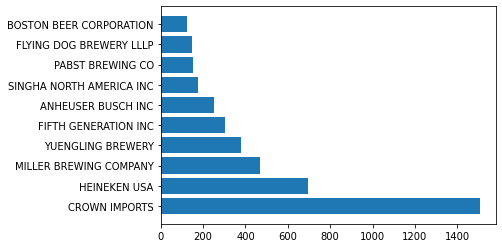

In [ ]:
y = top_10_botellas['Avg Sales']
x = top_10_botellas['Supplier']

plt.barh(x,y)

In [ ]:
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [ ]:
mtd_month = data2.groupby("Month", as_index=True).agg({"RetailSales":"mean","RetailTransfers":"mean","WarehouseSales":"mean"})
mtd_month

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.680690,5.576086,19.084146
2,5.940607,6.051522,20.243378
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.145487,6.951927,27.850703
8,6.411406,6.586180,28.181033
9,6.758769,6.421160,22.862328
10,6.550944,6.829832,22.393842
11,6.766893,7.105166,23.500630


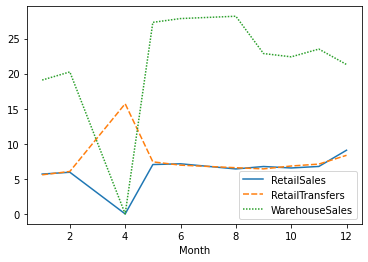

In [ ]:
sns.lineplot(data=mtd_month)

## 4. Plot the same information as above but as a bar chart.

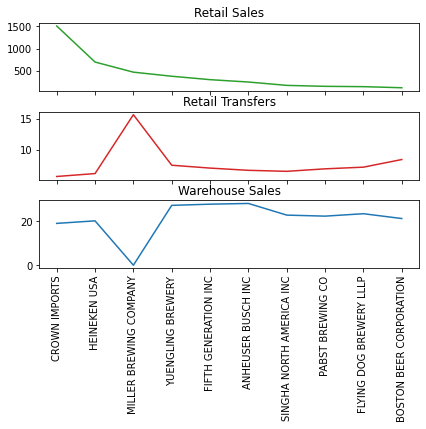

<Figure size 432x288 with 0 Axes>

In [ ]:


fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)
fig.tight_layout()
 # Or equivalently,  "plt.tight_layout()"

axs[0].title.set_text('Retail Sales')
y0=mtd_month['RetailSales']
axs[0].plot(x,y,'tab:green')

y1=mtd_month['RetailTransfers']
axs[1].title.set_text('Retail Transfers')
axs[1].plot(x,y1,'tab:red')

y2=mtd_month['WarehouseSales']
axs[2].title.set_text('Warehouse Sales')
axs[2].plot(x,y2,'tab:blue')


plt.xticks(rotation='vertical')

figure().tight_layout(pad=3.0)


## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [ ]:
data2

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,2.0
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.00,0.0,2.0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0


In [ ]:
multi_line=data2.pivot_table(index=['Year','Month'], columns=['ItemType'], values=['RetailSales'], aggfunc=({'RetailSales':'sum'}),fill_value=0)
multi_line


RetailSales               ...                              
ItemType          BEER DUNNAGE KEGS  ...    REF STR_SUPPLIES      WINE
Year Month                           ...                              
2017 4            0.00       0    0  ...   0.00         0.00      0.00
     5        25023.24       0    0  ...   0.00         0.00  34546.89
     6        27863.26       0    0  ...  30.60        89.22  33129.64
     8        23030.13       0    0  ...  19.54        77.34  30707.45
     9        23852.76       0    0  ...  38.88        94.64  32936.89
     10       22583.78       0    0  ...  22.82        84.38  33108.76
     11       23341.14       0    0  ...  63.11       106.06  38275.92
     12       28822.16       0    0  ...  41.21       439.64  51492.76
2018 1        16606.33       0    0  ...  23.66        56.94  29792.72
     2        18640.31       0    0  ...  41.52        47.76  29409.39

[10 rows x 8 columns]

<Figure size 1800x1800 with 0 Axes>

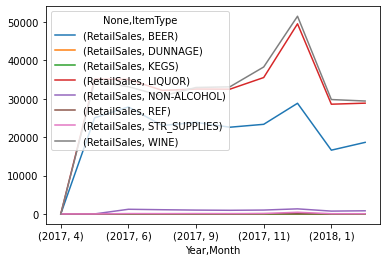

<Figure size 1800x1800 with 0 Axes>

In [ ]:
multi_line.plot()
#figure(figsize=(100, 50));
#fig.set_size_inches(18.5, 10.5, forward=True)
plt.figure(figsize=(25,25)) 



## 6. Plot the same information as above but as a bar chart.

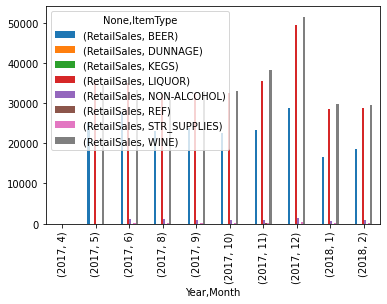

In [ ]:
multi_line.plot(kind='bar')


## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

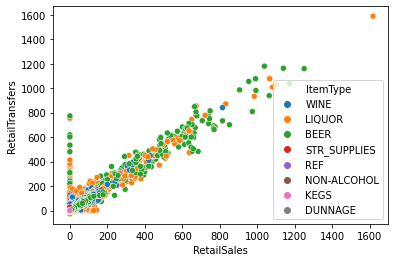

In [ ]:
sns.scatterplot(x=data2['RetailSales'], y=data2['RetailTransfers'],data=data2,hue=data2['ItemType'])

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

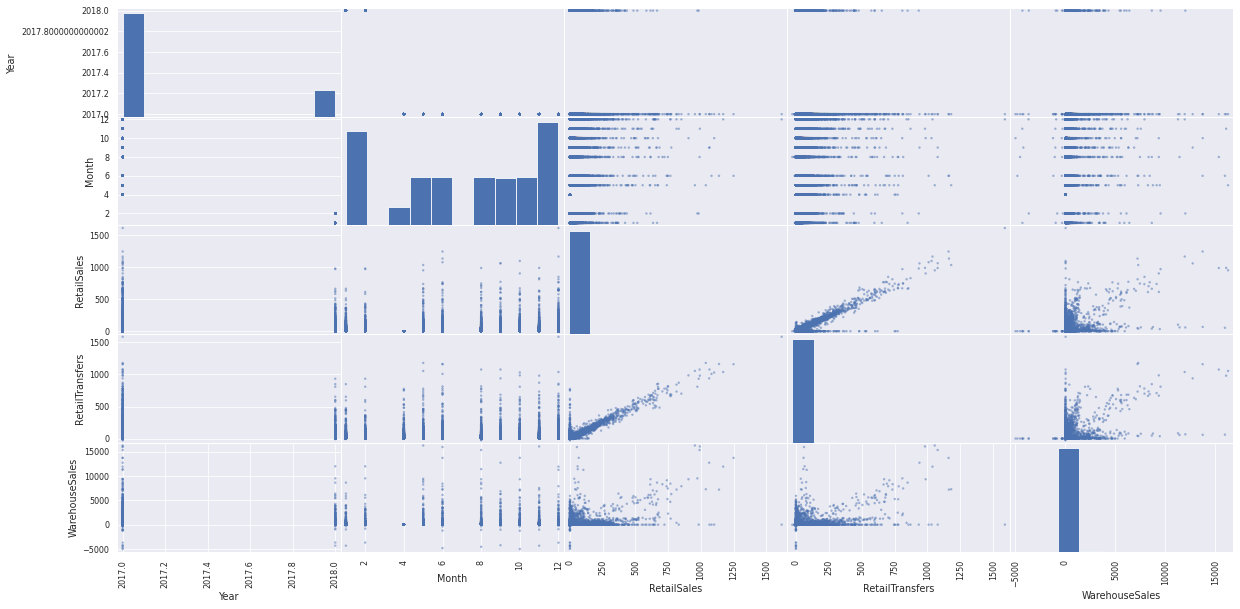

In [ ]:
sns.set(context='paper', style='darkgrid', rc={'figure.figsize': (20, 10)})

pd.plotting.scatter_matrix(data2.iloc[:, 0:10]);